## 1 Especificação do Problema
O objetivo desta prática é realizar alguns processamentos básicos em imagens digitais.
#### 1.1 Transformação de Intensidade
Transformar o espaço de intensidades (níveis de cinza) de uma imagem monocromática para (i) obter o negativo da imagem, ou seja, o níveis de cinza 0 será convertido para 255, o nível 1 para 254 e assim por diante.

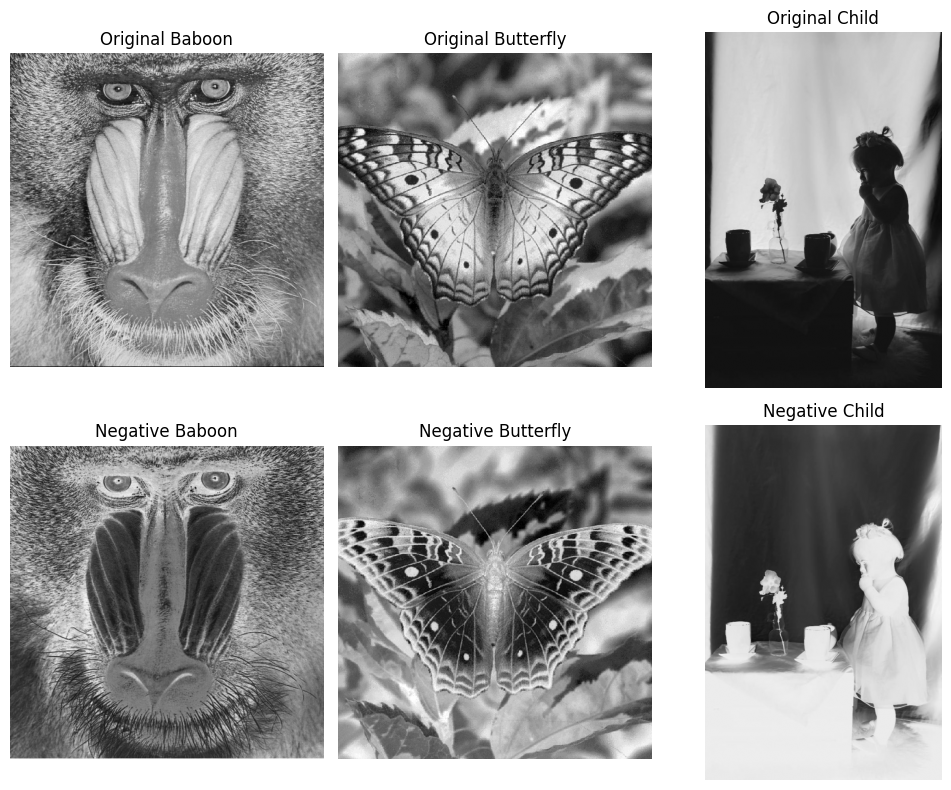

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('../images/baboon.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../images/butterfly.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('../images/crianca.jpg', cv2.IMREAD_GRAYSCALE)

# agora vamos inverter as imagens utilizando negativo
neg1 = 255 - img1.astype(np.uint8)
neg2 = 255 - img2.astype(np.uint8)
neg3 = 255 - img3.astype(np.uint8)

# agora vamos exibir as imagens originais e as invertidas
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1), plt.imshow(img1, cmap='gray'), plt.title('Original Baboon'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(img2, cmap='gray'), plt.title('Original Butterfly'), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(img3, cmap='gray'), plt.title('Original Child'), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(neg1, cmap='gray'), plt.title('Negative Baboon'), plt.axis('off')
plt.subplot(2, 3, 5), plt.imshow(neg2, cmap='gray'), plt.title('Negative Butterfly'), plt.axis('off')
plt.subplot(2, 3, 6), plt.imshow(neg3, cmap='gray'), plt.title('Negative Child'), plt.axis('off')
plt.tight_layout()
plt.show()

#### 1.2 Ajuste de Brilho
Aplicar a correção gama para ajustar o brilho de uma imagem monocromática A de entrada e gerar uma imagem monocromática B de saída. A transformação pode ser realizada aplicando-se a equação $$B = A^{(γ)}$$.

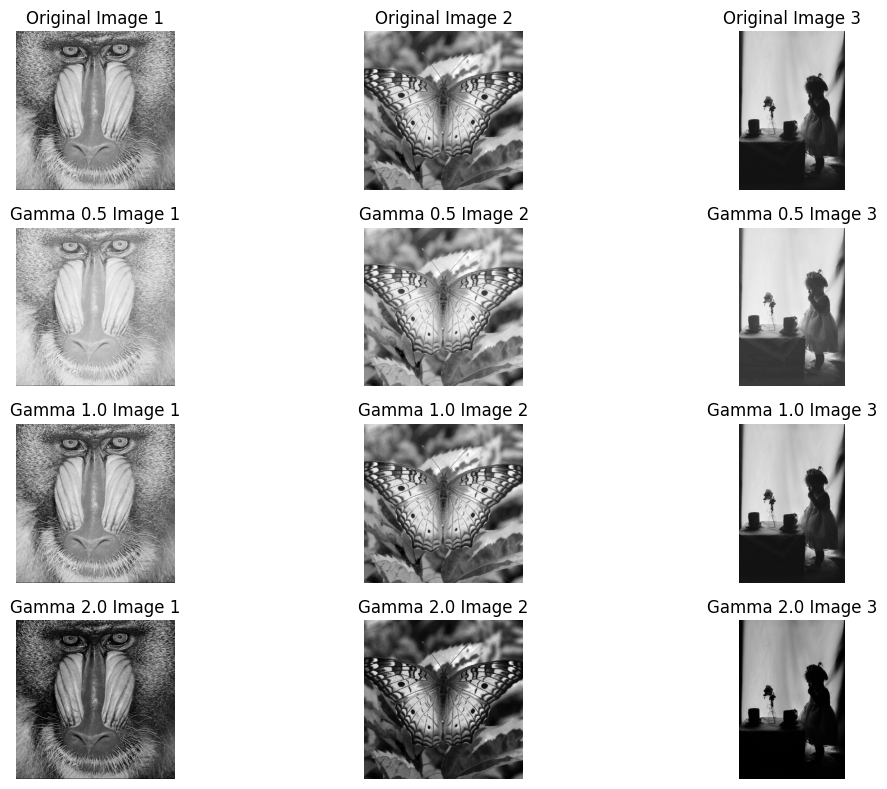

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('../images/baboon.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../images/butterfly.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('../images/crianca.jpg', cv2.IMREAD_GRAYSCALE)

img_list = [img1, img2, img3]

# vamos aplicar a transformação de potencia para ajustar o brilho
# vamos usar diferentes valores de gamma
gamma_values = [0.5, 1.0, 2.0]
adjusted_images = []
for gamma in gamma_values:
    for img in img_list:
        #np.clip limita os valores para o intervalo [0, 255]
        #temos que normalizar os valores entre 0,1 pq gama só funciona nesse intervalo
        adjusted = np.clip((img / 255.0) ** gamma * 255, 0, 255).astype(np.uint8)
        adjusted_images.append(adjusted)

# agora vamos exibir as imagens originais e as ajustadas
plt.figure(figsize=(12, 8))
for i, img in enumerate(img_list):
    plt.subplot(4, 3, i + 1), plt.imshow(img, cmap='gray'), plt.title(f'Original Image {i+1}'), plt.axis('off')
for j, adjusted in enumerate(adjusted_images):
    plt.subplot(4, 3, j + 4), plt.imshow(adjusted, cmap='gray'), plt.title(f'Gamma {gamma_values[j//3]} Image {(j%3)+1}'), plt.axis('off')
plt.tight_layout()
plt.show()

#### 1.3 Alargamento de contraste
Aplicar a alargamento de contraste para melhorar a imagem crianca.jpg de entrada e gerar uma imagem monocromática B de saída. A transformação pode ser realizada aplicando-se a equação 
$$s = (r - r_{min}) * \frac{(L_{max} - L_{min})}{(r_{max} - r_{min})} + L_{min}$$
onde:

$r_{min}$ = intensidade mínima na imagem original

$r_{max}$ = intensidade máxima na imagem original

$L_{min}$ = intensidade mínima desejada (normalmente 0)

$L_{max}$ = intensidade máxima desejada (normalmente 255 ou 1).

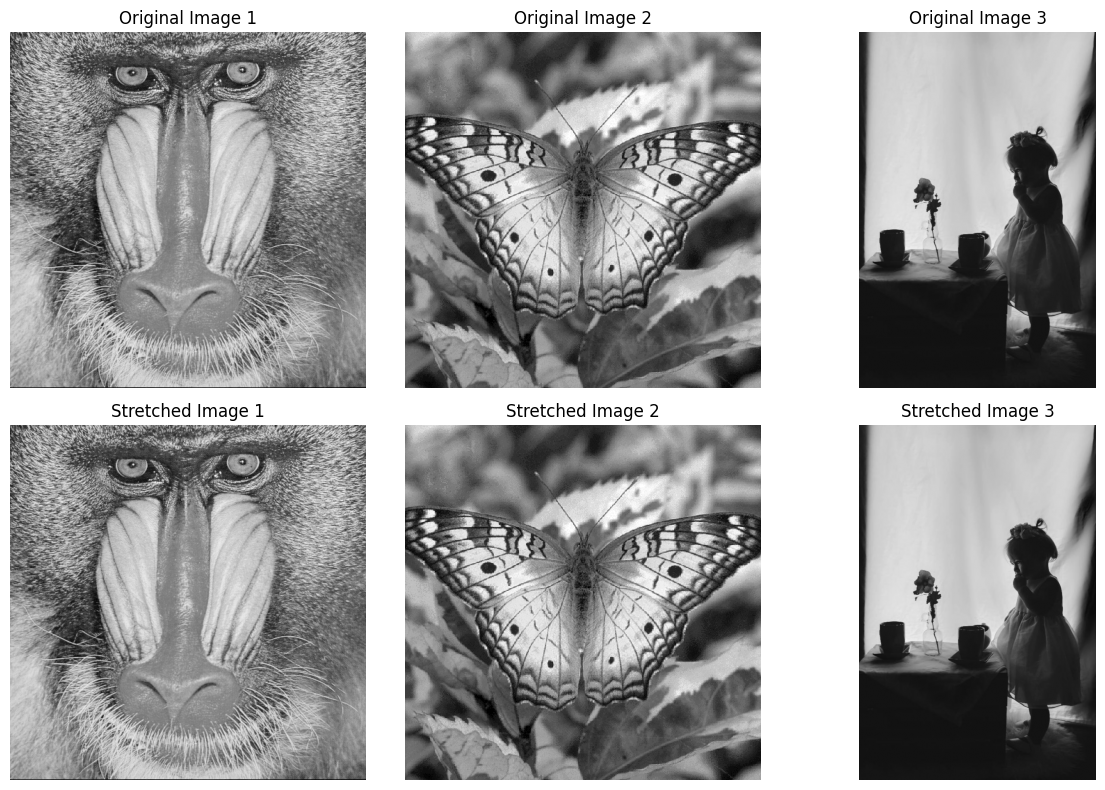

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('../images/baboon.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../images/butterfly.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('../images/crianca.jpg', cv2.IMREAD_GRAYSCALE)

img_list = [img1, img2, img3]

# vamos aplicar o alargamento de constraste
stretched_images = []
for img in img_list:
    img_float = img.astype(np.float32)
    r_min, r_max = np.min(img), np.max(img)
    L_min, L_max = 0, 255
    s = ((img - r_min) * ((L_max - L_min) / (r_max - r_min)) )+ L_min
    s = np.clip(s, 0, 255).astype(np.uint8)
    stretched_images.append(s)

# agora vamos exibir as imagens originais e as ajustadas
plt.figure(figsize=(12, 8))
for i, img in enumerate(img_list):
    plt.subplot(2, 3, i + 1), plt.imshow(img, cmap='gray'), plt.title(f'Original Image {i+1}'), plt.axis('off')
for j, stretched in enumerate(stretched_images):
    plt.subplot(2, 3, j + 4), plt.imshow(stretched, cmap='gray'), plt.title(f'Stretched Image {j+1}'), plt.axis('off')
plt.tight_layout()
plt.show()

#### 1.4 Combinação de Imagens
Combinar duas imagens monocromáticas de mesmo tamanho por meio da média ponderada de seus
níveis de cinza.

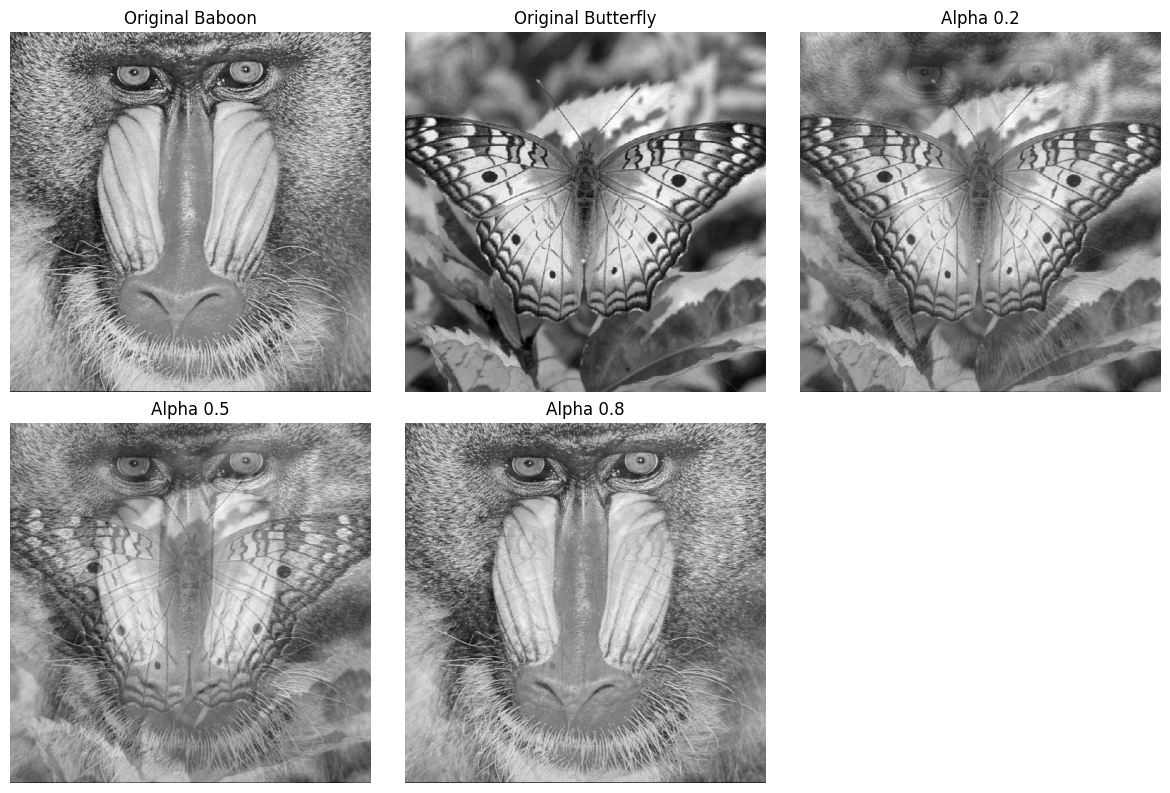

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('../images/baboon.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../images/butterfly.png', cv2.IMREAD_GRAYSCALE)

img_list = [img1, img2]

# vamos fazer a combinação das imagens por média ponderada de seus niveis de cinza
# vamos usar (0.2,0.8) (0.5,0.5) e (0.8,0.2) como pesos
alpha_values = [0.2, 0.5, 0.8]
combined_images = []
for alpha in alpha_values:
    beta = 1.0 - alpha
    # a funcao addWeighted do opencv recebe os pesos e o ultimo parametro é um valor escalar que é somado a cada pixel
    # esse ultimo valor pode ser usado para ajustar o brilho da imagem resultante
    combined = cv2.addWeighted(img1, alpha, img2, beta, 0)
    combined_images.append(combined)

# agora vamos exibir as imagens originais e as combinadas
# ao total serão 5 imagens por isso vamos usar 2 linhas e 3 colunas
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(img1, cmap='gray'), plt.title('Original Baboon'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(img2, cmap='gray'), plt.title('Original Butterfly'), plt.axis('off')
for j, combined in enumerate(combined_images):
    plt.subplot(2, 3, j + 3), plt.imshow(combined, cmap='gray'), plt.title(f'Alpha {alpha_values[j]}'), plt.axis('off')
plt.tight_layout()
plt.show()